In [12]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

In [17]:
def truncated_svd(A, rank):
    U, S, V = np.linalg.svd(A)
    U = U[:, :rank]
    S = np.diag(S[:rank])
    V = V[:rank, :]
    approximation = U @ S @ V
    assert np.linalg.matrix_rank(approximation) == rank
    return approximation

In [18]:
graph = nx.barabasi_albert_graph(20, 2)
A = np.array(nx.adjacency_matrix(graph).todense())

/tmp/ipykernel_31292/2721976763.py:2: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  A = np.array(nx.adjacency_matrix(graph).todense())


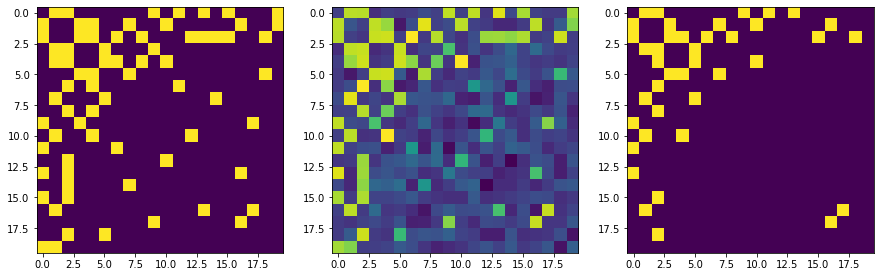

In [35]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].imshow(A)
ax[1].imshow(truncated_svd(A, 10))
ax[2].imshow(truncated_svd(A, 10) > np.quantile(truncated_svd(A, 10).flatten(), 0.9))

array([[0.01348994, 0.00457113, 0.00801941, 0.06635123, 0.00756599,
        0.01808513, 0.00535422, 0.06531724, 0.01169938, 0.00447657,
        0.01295578, 0.00820124, 0.0291211 , 0.0693632 , 0.05710976,
        0.04172823, 0.01615608, 0.00770555, 0.00607907, 0.05109319],
       [0.00457113, 0.11650341, 0.01564073, 0.00489284, 0.07389184,
        0.15810516, 0.07752907, 0.08318241, 0.02107086, 0.07487573,
        0.00210484, 0.01813004, 0.01194436, 0.09244042, 0.09030155,
        0.00860538, 0.00139575, 0.04185448, 0.14750063, 0.12606352],
       [0.00801941, 0.01564073, 0.03127827, 0.02421221, 0.03259948,
        0.0105538 , 0.13953651, 0.01960749, 0.01614283, 0.04469373,
        0.05364874, 0.07846038, 0.06919087, 0.06415218, 0.09537446,
        0.03352956, 0.0070569 , 0.02591036, 0.03480945, 0.00075958],
       [0.06635123, 0.00489284, 0.02421221, 0.08455991, 0.041294  ,
        0.02139814, 0.06363774, 0.04291009, 0.02245964, 0.2585757 ,
        0.04329045, 0.08953535, 0.0381128 , 0

In [61]:
np.allclose(truncated, truncated.T)

True

In [64]:
np.linalg.eigvalsh(adjacency).max()

5.177935384438678